#### Transfer learning

In [1]:
!$PATH

/bin/bash: line 1: /home/pranshumaan/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin:/usr/lib/cuda/bin: No such file or directory


In [2]:
import torch
torch.__version__

'2.0.1+cu117'

In [3]:
import torchvision
torchvision.__version__

'0.15.2+cu117'

Commenting out the below as new installs of Pytorch and Torchvision are advanced versions

In [4]:
# # For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
# try:
#     import torch
#     import torchvision
#     assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
#     assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")
# except:
#     print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
#     !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
#     import torch
#     import torchvision
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")

In [5]:
torch.cuda.is_available()

True

In [6]:
%pwd

'/home/pranshumaan'

In [7]:
cd /media/pranshumaan/TOSHIBA\ EXT/Dev

/media/pranshumaan/TOSHIBA EXT/Dev


In [8]:
pwd

'/media/pranshumaan/TOSHIBA EXT/Dev'

In [9]:
cd Deep_Learning_Pytorch_Udemy_Tutorial/

/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial


In [10]:
ls

01_Linear_Regression_1.ipynb
02_Linear_Regression_2.ipynb
03_Neural_network_classification.ipynb
04_Neural_network_classification.ipynb
05_Neural_network_multilabel_classification.ipynb
06_Neural_network_multilabel_classification.ipynb
07_Computer_vision_and_CNN.ipynb
08_Computer_vision_and_CNN.ipynb
09_Pytorch_custom_datasets.ipynb
10_Pytorch_custom_datasets.ipynb
11_Pytorch_custom_datasets.ipynb
12_Writing_modular_files_from_notebook.ipynb
Course_creator_notebooks/
data/
data_pizza_steak_sushi/
models/
TinyVGG/


In [11]:
cd TinyVGG/

/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial/TinyVGG


In [12]:
ls

data_setup.py  model_builder.py  pizza_steak_sushi/  __pycache__/  utils.py
engine.py      models/           predictions.py      train.py


In [13]:
import data_setup

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [15]:
!nvidia-smi

Mon May 22 11:51:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   58C    P8    10W /  60W |     46MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
ls

data_setup.py  model_builder.py  pizza_steak_sushi/  __pycache__/  utils.py
engine.py      models/           predictions.py      train.py


In [17]:
ls pizza_steak_sushi/

test/  train/


In [18]:
pwd

'/media/pranshumaan/TOSHIBA EXT/Dev/Deep_Learning_Pytorch_Udemy_Tutorial/TinyVGG'

In [19]:
import os
from pathlib import Path

image_path = Path('pizza_steak_sushi/')
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('pizza_steak_sushi/train'), PosixPath('pizza_steak_sushi/test'))

#### Creating datasets and dataloaders

From torchvision documentation (old version)

>All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.

>The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

>You can use the following transform to normalize:

>` normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
`

Below is commented out because using auto transforms in practice

In [22]:
# from torchvision import transforms

# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])

# manual_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
#                                         transforms.ToTensor(),
#                                         normalize])

In [23]:
import data_setup

In [24]:
# train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
#                                                                   test_dir=test_dir,
#                                                                   transform=manual_transforms,
#                                                                   batch_size=32)
# train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f736efb5ae0>,
 ['pizza', 'steak', 'sushi'])

#### Creating automatic transforms for torchvision.models

In [25]:
import torchvision
torchvision.__version__

'0.15.2+cu117'

In [40]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT #DEFAULT gets the bestavailable weight
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [41]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [42]:
dir(weights)

['__class__',
 '__doc__',
 '__module__',
 'get_state_dict',
 'meta',
 'name',
 'transforms',
 'url',
 'value',
 'verify']

In [43]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms,
                                                                               batch_size=32)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f736ed418a0>,
 ['pizza', 'steak', 'sushi'])

#### Setting up a pretrained model
Creating and instance of pre trained EfficientNet B0

In [60]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [48]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_impl',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook

In [61]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

#### Getting a summary of the model

In [54]:
from torchinfo import summary
summary(model=model,
        input_size=(1,3,224,224),
        col_names = ["input_size", "output_size", "num_params", "trainable"],
#         col_width = 20,
        row_settings = ["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]          [1, 1000]                 --                        True
├─Sequential (features)                                      [1, 3, 224, 224]          [1, 1280, 7, 7]           --                        True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]          [1, 32, 112, 112]         --                        True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]          [1, 32, 112, 112]         864                       True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]         [1, 32, 112, 112]         64                        True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]         [1, 32, 112, 112]         --                

Note: We want to alter only the output to 3 classes, and therefore we only want the last layer to be trainable. Therefore we need to turn trainable = False for all other layers, i.e. we need to freeze all other layers

#### Freezing the model and changing the output layer

In [58]:
# Freezing layers
for param in model.features.parameters():
    param.requires_grad = False #No longer tracking the gradients therefore no impact of backpropagation

In [63]:
summary(model=model,
        input_size=(1,3,224,224),
        col_names = ["input_size", "output_size", "num_params", "trainable"],
#         col_width = 20,
        row_settings = ["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]          [1, 3]                    --                        True
├─Sequential (features)                                      [1, 3, 224, 224]          [1, 1280, 7, 7]           --                        True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]          [1, 32, 112, 112]         --                        True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]          [1, 32, 112, 112]         864                       True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]         [1, 32, 112, 112]         64                        True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]         [1, 32, 112, 112]         --                

In [62]:
# Updating the classsifier to have 3 classes

from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier = nn.Sequential(nn.Dropout(p=0.2, inplace=True),
                                 nn.Linear(in_features=1280, out_features=len(class_names))).to(device)
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [64]:
# Freezing layers
for param in model.features.parameters():
    param.requires_grad = False #No longer tracking the gradients therefore no impact of backpropagation

In [65]:
summary(model=model,
        input_size=(1,3,224,224),
        col_names = ["input_size", "output_size", "num_params", "trainable"],
#         col_width = 20,
        row_settings = ["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]          [1, 3]                    --                        Partial
├─Sequential (features)                                      [1, 3, 224, 224]          [1, 1280, 7, 7]           --                        False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]          [1, 32, 112, 112]         --                        False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]          [1, 32, 112, 112]         (864)                     False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]         [1, 32, 112, 112]         (64)                      False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]         [1, 32, 112, 112]         --         

In [68]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [69]:
 next(model.parameters()).device

device(type='cuda', index=0)

#### Training the model

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [72]:
import data_setup
import engine
import model_builder
import predictions
import train
import utils

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

end_time = timer()

print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

results

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0962 | train_acc: 0.3906 | test_loss: 0.9144 | test_acc: 0.5909
Epoch: 2 | train_loss: 0.8707 | train_acc: 0.7695 | test_loss: 0.7918 | test_acc: 0.8456
Epoch: 3 | train_loss: 0.7686 | train_acc: 0.7930 | test_loss: 0.7461 | test_acc: 0.8352
Epoch: 4 | train_loss: 0.7167 | train_acc: 0.7422 | test_loss: 0.6369 | test_acc: 0.8759
Epoch: 5 | train_loss: 0.6291 | train_acc: 0.7695 | test_loss: 0.6271 | test_acc: 0.8968
[INFO] Total training time: 9.099 seconds


{'train_loss': [1.096208281815052,
  0.8707156330347061,
  0.768616147339344,
  0.7166860401630402,
  0.6291423849761486],
 'train_acc': [0.390625, 0.76953125, 0.79296875, 0.7421875, 0.76953125],
 'test_loss': [0.9143906037012736,
  0.7918326457341512,
  0.7461293538411459,
  0.636920710404714,
  0.6271234154701233],
 'test_acc': [0.5909090909090909,
  0.8456439393939394,
  0.8352272727272728,
  0.8759469696969697,
  0.8967803030303031]}

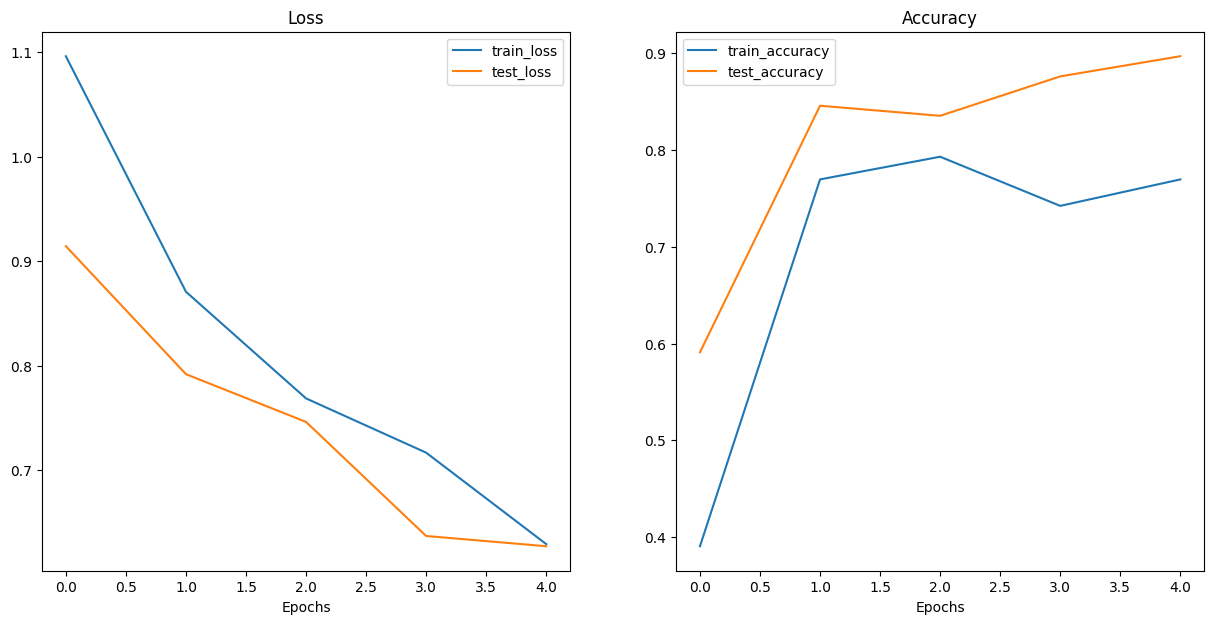

In [73]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)


#### Making predictions using the feature-extracted model

In [74]:
ls

data_setup.py  model_builder.py  pizza_steak_sushi/  __pycache__/  utils.py
engine.py      models/           predictions.py      train.py


'pizza'

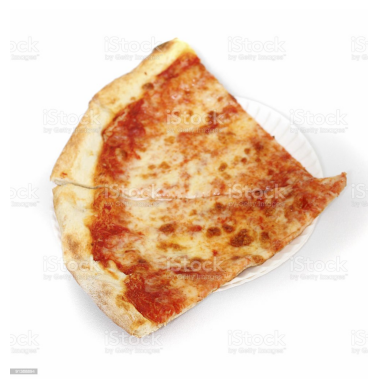

In [100]:
from PIL import Image
import matplotlib.pyplot as plt

test_image = Image.open('04-pizza-dad.jpeg')
plt.axis('off')
plt.imshow(test_image);

test_image_tensor = auto_transforms(test_image).to(device)
test_image_tensor = test_image_tensor.unsqueeze(dim=0)
test_image_tensor.shape

model.eval()

with torch.inference_mode():
    model = model.to(device)
    pred = model(test_image_tensor)
    
    
class_names[pred.argmax(dim=1).item()]